In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from mnist_classifier.dataloader import load_mnist, get_model

In [2]:
model_fn = './model230527.pth'
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
def load(fn, device):
    data_load = torch.load(fn, map_location=device)

    return data_load['model'], data_load['config']

In [4]:
def plot(X, y_hat):
    for i in range(X.shape[0]):
        img = (np.array(X[i].detach().cpu(), dtype='float')).reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.show()
            
        print('Predict:', float(torch.argmax(y_hat[i], dim=-1)))

In [5]:
def conf_mat(y, y_hat):
    print(ConfusionMatrixDisplay.from_predictions(y, torch.argmax(y_hat, dim=-1)))

In [6]:
def test(model, X, y, to_be_shown=False, matrix=False):
    model.eval()

    with torch.no_grad():
        y_hat = model(X)
        
        correct_cnt = (y.squeeze() == torch.argmax(y_hat, dim=-1)).sum()
        total_cnt = float(X.shape[0])
        accuracy = correct_cnt / total_cnt

    print(f'Accuracy: {accuracy:.6f}')

    if to_be_shown is True:
        plot(X, y_hat)
    
    if matrix is True:
        conf_mat(y, y_hat)

Accuracy: 0.991500


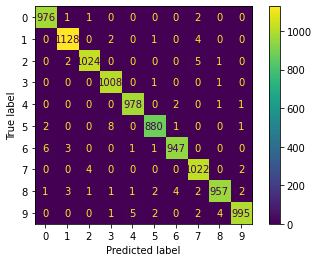

In [7]:
model_dict, train_config = load(model_fn, device)

X, y = load_mnist(is_train=False, flatten=(train_config.model == 'fc'))
X, y = X.to(device), y.to(device)

input_size = int(X.shape[-1])
output_size = int(max(y) + 1)

model = get_model(input_size, output_size, train_config).to(device)

model.load_state_dict(model_dict)

test(model, X, y, matrix=True)

Accuracy: 1.000000


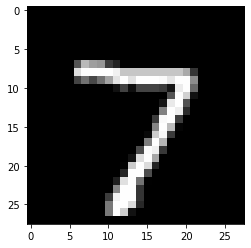

Predict: 7.0


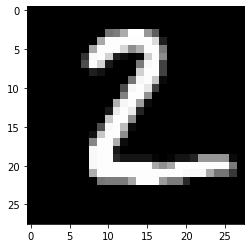

Predict: 2.0


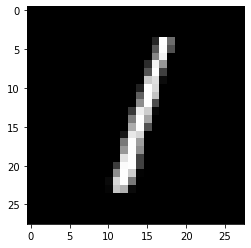

Predict: 1.0


In [8]:
n_test = 3
test(model, X[:n_test], y[:n_test], to_be_shown=True)